In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

Reading the DataSet

In [2]:
dataFrame = pd.read_csv("genres_v2.csv")

C:\Users\ABC\AppData\Local\Temp\ipykernel_14032\818523226.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  dataFrame = pd.read_csv("genres_v2.csv")


In [3]:
dataFrame.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [4]:
dataFrame.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

Columns having null values

In [5]:
dataFrame.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

Droping the Column Unnamed: 0  as it is unusefull

In [6]:
dataFrame.drop("Unnamed: 0", axis=1, inplace=True)
dataFrame.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN


In [7]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

Filling the nan values of songs with 0
Also the title column


In [8]:
dataFrame["song_name"].fillna("0", inplace=True)
dataFrame.fillna("0", inplace=True)
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

### Visualization and Analysis

C:\Users\ABC\AppData\Local\Temp\ipykernel_14032\4220429721.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Matrix = dataFrame.corr()


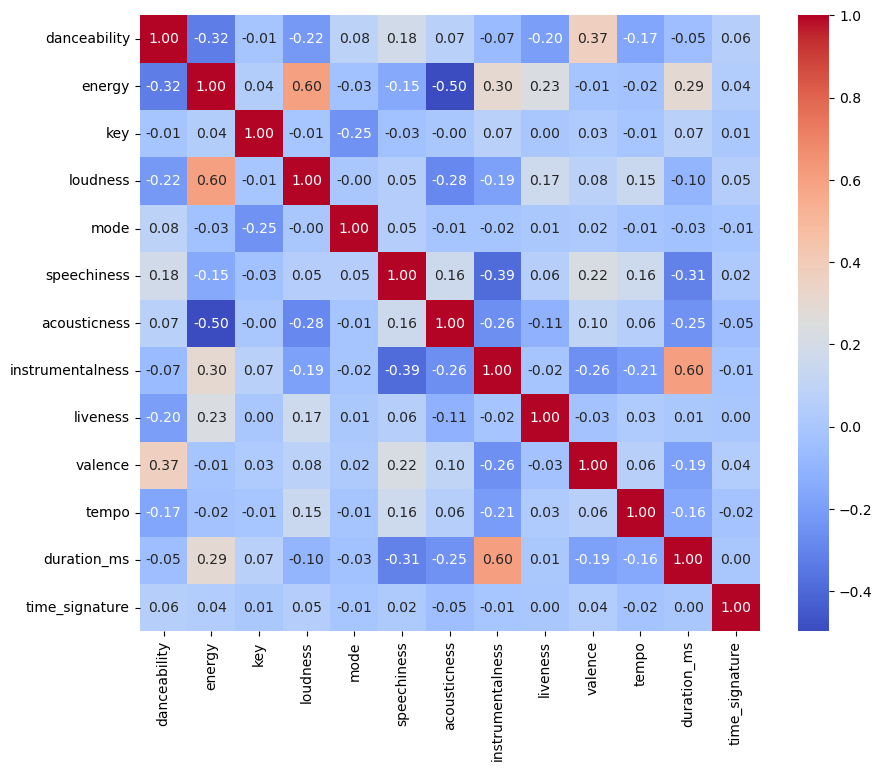

In [9]:
plt.figure(figsize=(10, 8))
Matrix = dataFrame.corr()
sns.heatmap(Matrix, cmap = "coolwarm", annot=True,fmt=".2f")
plt.show()
#print(Matrix)

In [10]:
dataFrame["genre"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

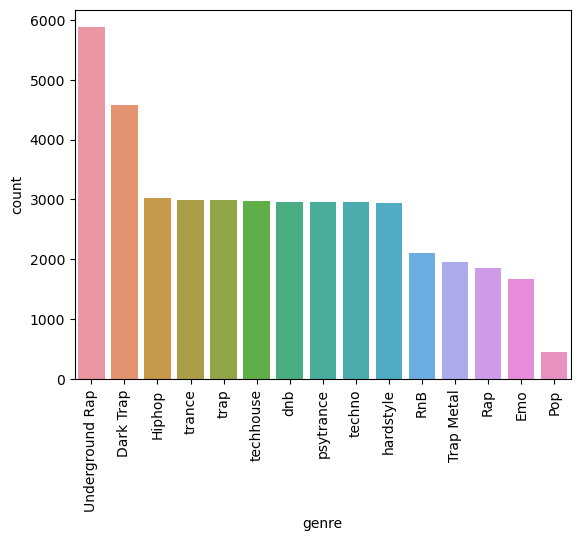

In [11]:
sns.countplot(x="genre", data=dataFrame, order=dataFrame["genre"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

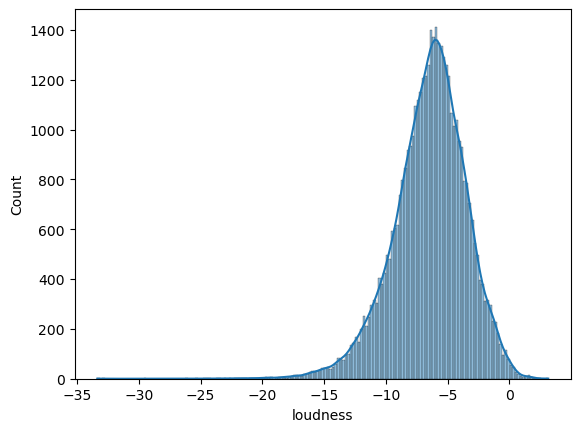

In [12]:
sns.histplot(x="loudness", data=dataFrame, kde=True)
plt.show()

## Features Engineering 

Encoding Catagorical variables like Key & Mode  (using 1 hot encoding)

In [13]:
dataFrame["key"].unique()

array([ 2,  8,  5,  0,  1, 11, 10,  6,  7,  9,  4,  3], dtype=int64)

In [14]:
dataFrame["mode"].unique()

array([1, 0], dtype=int64)

Encoding Categorical Variables

In [15]:
df= pd.get_dummies(dataFrame, columns=["key", "mode"])
df.head(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
0,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,...,0,0,0,0,0,0,0,0,0,1
1,0.719,0.493,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,...,0,0,0,0,1,0,0,0,0,1
2,0.850,0.893,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,...,0,1,0,0,0,0,0,0,0,1


Checking the count of Genre

In [16]:
df["genre"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

visualizing the Genre using CountPlot

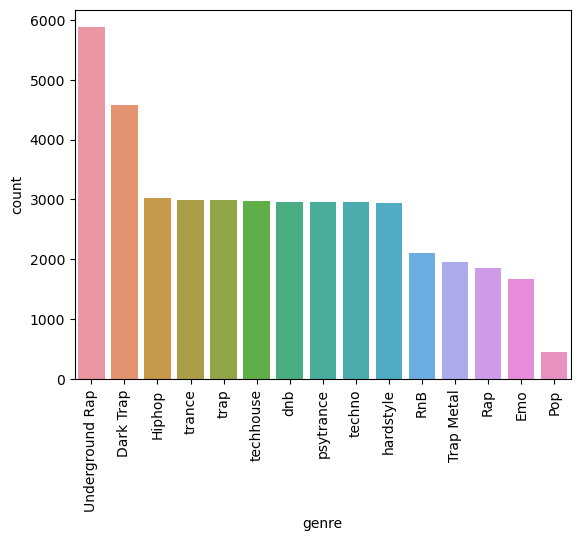

In [17]:
sns.countplot(x="genre", data=df, order= df["genre"].value_counts().index )
plt.xticks(rotation=90)
plt.show()

Min and Max scaling of Numerical Features

In [18]:
Scalar = MinMaxScaler()

numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


df[numerical_features]= Scalar.fit_transform(df[numerical_features])

In [19]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,...,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.622239,0.762458,0.736654,0.123319,0.097327,0.286196,0.208103,0.349119,0.551413,0.253834,...,0.055974,0.070772,0.087791,0.101052,0.079069,0.076918,0.076847,0.098097,0.450538,0.549462
std,0.169701,0.183868,0.080569,0.136649,0.172902,0.374915,0.179654,0.240586,0.146896,0.116015,...,0.229875,0.256446,0.282994,0.301401,0.269849,0.266464,0.266351,0.297449,0.497553,0.497553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.497237,0.631911,0.690207,0.028593,0.001750,0.000000,0.090965,0.146807,0.443338,0.173801,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.629429,0.802952,0.742994,0.057186,0.016598,0.006006,0.127187,0.312906,0.536005,0.224418,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.759454,0.922981,0.790138,0.184447,0.108299,0.730030,0.289880,0.519241,0.637599,0.310477,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Converting Duration from ms to Minutes

In [20]:
df["duration_Minutes"] = df["duration_ms"] / 60000

Loudness into categories and Aloting Numbers

In [21]:
df['loudness_bin'] = pd.cut(df['loudness'], bins=5, labels=['very soft', 'soft', 'moderate', 'loud', 'very loud'])

In [22]:
labels=['very soft', 'soft', 'moderate', 'loud', 'very loud']

loudness_mapping = {label: i for i, label in enumerate(labels)}

df["loudness Encoded"] = df["loudness_bin"].map(loudness_mapping)

df.head(3)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,...,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,duration_Minutes,loudness_bin,loudness Encoded
0,0.829884,0.813955,0.712039,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006,audio_features,...,0,0,0,0,0,0,1,0.000002,loud,3
1,0.708527,0.492877,0.715710,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848,audio_features,...,0,1,0,0,0,0,1,0.000004,loud,3
2,0.850471,0.892974,0.782742,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200,audio_features,...,0,0,0,0,0,0,1,0.000001,loud,3


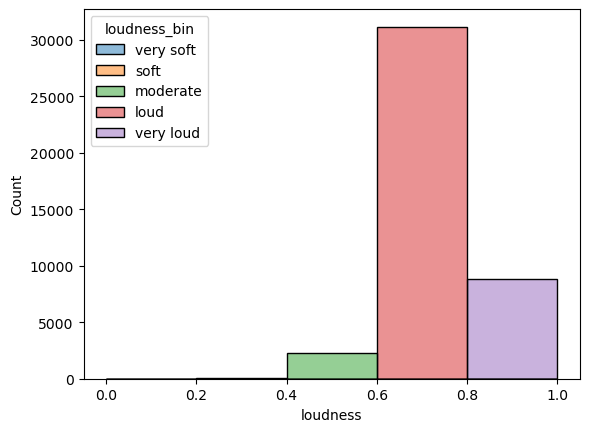

In [23]:
sns.histplot(x="loudness", data=df, bins=5, hue="loudness_bin")
plt.show()

Text to Nummeric representation of features

In [24]:

# Create a TF-IDF vectorizer for 'genre' and 'song_name'
tfidf_vectorizer = TfidfVectorizer(max_features=5)

# Transform 'genre' and 'song_name' into numerical features
genre_tfidf = tfidf_vectorizer.fit_transform(df['genre'])
song_name_tfidf = tfidf_vectorizer.fit_transform(df['song_name'])

# Convert the sparse matrices to DataFrames and concatenate them with the original data
genre_df = pd.DataFrame(genre_tfidf.toarray(), columns=[f'genre_tfidf_{i}' for i in range(5)])
song_name_df = pd.DataFrame(song_name_tfidf.toarray(), columns=[f'song_name_tfidf_{i}' for i in range(5)])

df = pd.concat([df, genre_df, song_name_df], axis=1)

In [25]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,...,genre_tfidf_0,genre_tfidf_1,genre_tfidf_2,genre_tfidf_3,genre_tfidf_4,song_name_tfidf_0,song_name_tfidf_1,song_name_tfidf_2,song_name_tfidf_3,song_name_tfidf_4
0,0.829884,0.813955,0.712039,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006,audio_features,...,0.791228,0.0,0.0,0.611521,0.0,0.0,0.0,0.0,0.0,0.0
1,0.708527,0.492877,0.715710,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848,audio_features,...,0.791228,0.0,0.0,0.611521,0.0,0.0,0.0,0.0,0.0,0.0
2,0.850471,0.892974,0.782742,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200,audio_features,...,0.791228,0.0,0.0,0.611521,0.0,0.0,0.0,0.0,0.0,0.0
3,0.445227,0.780947,0.784742,0.086971,0.023987,0.000000,0.105699,0.161250,0.794595,audio_features,...,0.791228,0.0,0.0,0.611521,0.0,0.0,0.0,0.0,1.0,0.0
4,0.794127,0.623909,0.703712,0.292754,0.219635,0.000000,0.158907,0.590426,0.554579,audio_features,...,0.791228,0.0,0.0,0.611521,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.501571,0.692925,0.772743,0.008340,0.031882,0.000349,0.112862,0.387187,0.567055,audio_features,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
42301,0.489652,0.767944,0.696754,0.027293,0.022772,0.000018,0.198813,0.375838,0.566531,audio_features,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
42302,0.320620,0.820956,0.828791,0.030109,0.026315,0.000245,0.382994,0.108635,0.597377,audio_features,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
42303,0.446311,0.920981,0.782906,0.017871,0.000557,0.029929,0.047887,0.484164,0.567233,audio_features,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Machine Learning Model Implementation

### Linear Regression on DF["energy"] 
> Target is DF["loudness"]

In [26]:
model = LinearRegression()


X = df["energy"].to_numpy()
X = X.reshape(-1,1)   
Y = df["loudness"].to_numpy()

model.fit(X, Y)


LinearRegression()

In [27]:
X_new = np.array([0.5]).reshape(-1,1)
Y_pred = model.predict(X_new)
print(f"Predicted on X_new {Y_pred}")

pred = model.predict(X)
mse = mean_squared_error(Y, pred)
mse

Predicted on X_new [0.66747332]


0.004142346391169245

### Logistic Regression which used to predict Binary Classification

In [28]:
X = df[["energy", "liveness", "tempo", "time_signature", "valence"]]
Y = (df["loudness_bin"] == "loud").astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
Y

0        1
1        1
2        1
3        1
4        1
        ..
42300    1
42301    1
42302    0
42303    1
42304    1
Name: loudness_bin, Length: 42305, dtype: int32

In [29]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [30]:
Y_pred = model.predict(X_test)
Accuracy = accuracy_score(Y_pred, y_test)
Accuracy

0.7300661834226284